In [1]:
import sys
sys.executable

'C:\\Users\\SEAN\\anaconda3\\envs\\Carbon_Cloud\\python.exe'

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#Creating a dataframe
transport_df = pd.read_csv("C:\\Users\\SEAN\\Desktop\\Project\\Datasets\\CO2_Emissions_Canada.csv")
transport_df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
#Renaming column names
transport_df.rename(columns={'Make':'make', 'Model':'model', 'Vehicle Class':'vehicle_class', 'Engine Size(L)':'engine_size', 'Cylinders':'cylinders', 'Transmission':'transmission', 'Fuel Type':'fuel_type','Fuel Consumption City (L/100 km)':'fuel_consumption_city','Fuel Consumption Hwy (L/100 km)':'fuel_consumption_hwy','Fuel Consumption Comb (L/100 km)':'fuel_consumption_comb','Fuel Consumption Comb (mpg)':'fuel_consumption_comb_mpg','CO2 Emissions(g/km)':'co2_emissions'}, inplace=True)

#Information about the Dataframe
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   make                       7385 non-null   object 
 1   model                      7385 non-null   object 
 2   vehicle_class              7385 non-null   object 
 3   engine_size                7385 non-null   float64
 4   cylinders                  7385 non-null   int64  
 5   transmission               7385 non-null   object 
 6   fuel_type                  7385 non-null   object 
 7   fuel_consumption_city      7385 non-null   float64
 8   fuel_consumption_hwy       7385 non-null   float64
 9   fuel_consumption_comb      7385 non-null   float64
 10  fuel_consumption_comb_mpg  7385 non-null   int64  
 11  co2_emissions              7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


In [5]:
# Qualitative / Categorical Variables :- make, model, vehicle_class, transmission, fuel_type
transport_df_qualitative = transport_df.drop(['engine_size','cylinders','fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'fuel_consumption_comb_mpg', 'co2_emissions'], axis=1)

# Quantitative Variables              :- engine_size, cylinders, fuel_consumption_city_(L/100 km), fuel_consumption_hwy_(L/100 km), fuel_consumption_comb_(L/100 km), fuel_consumption_comb_(mpg), co2_emissions(g/km)
transport_df_quantitative = transport_df.drop(['make','model', 'vehicle_class', 'transmission', 'fuel_type'], axis=1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f

In [7]:
# Forward Selection with only Independent Quantitative Variables
# For variable to enter the model we set the p_value (Threshold value) to 0.05

In [8]:
# IQV => Independent Quantitative Variables DV => Dependent Variable
transport_df_IQV_TO_DV = transport_df_quantitative.drop(['co2_emissions'], axis=1)

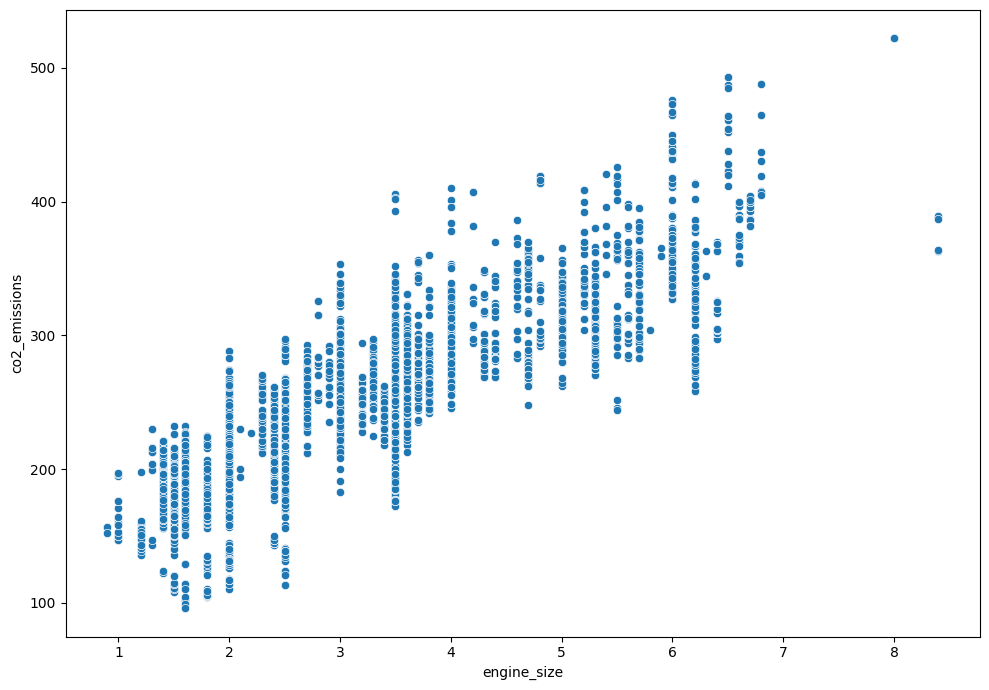

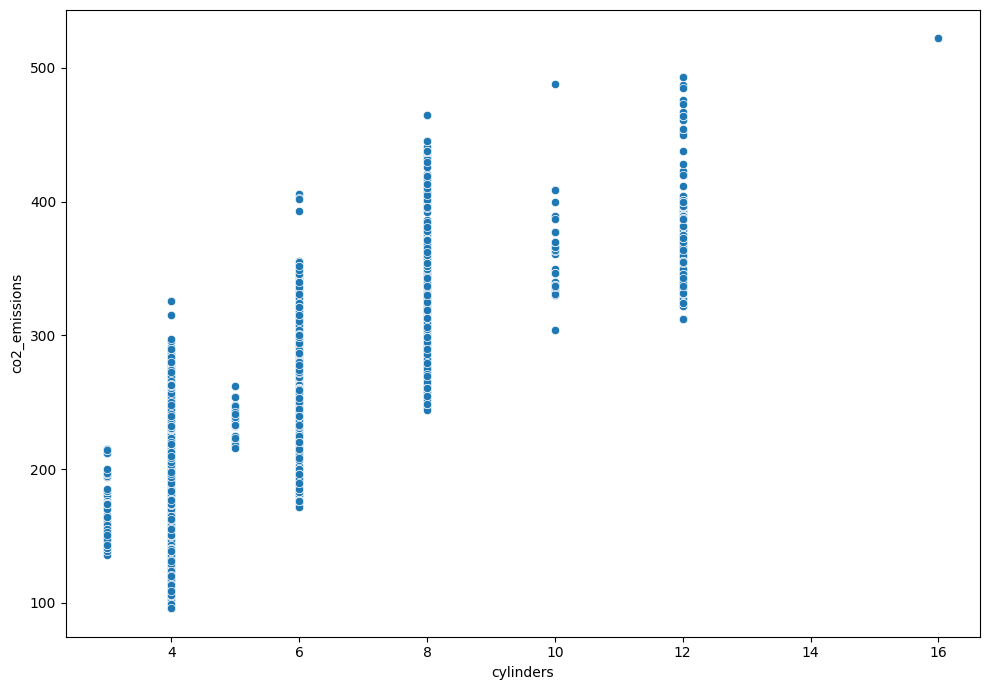

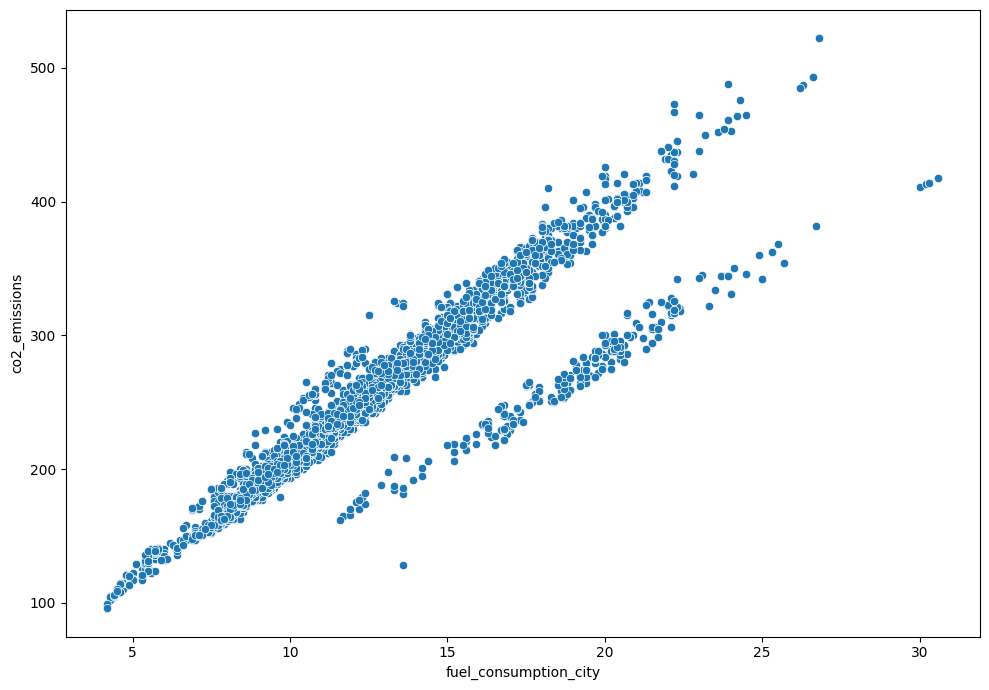

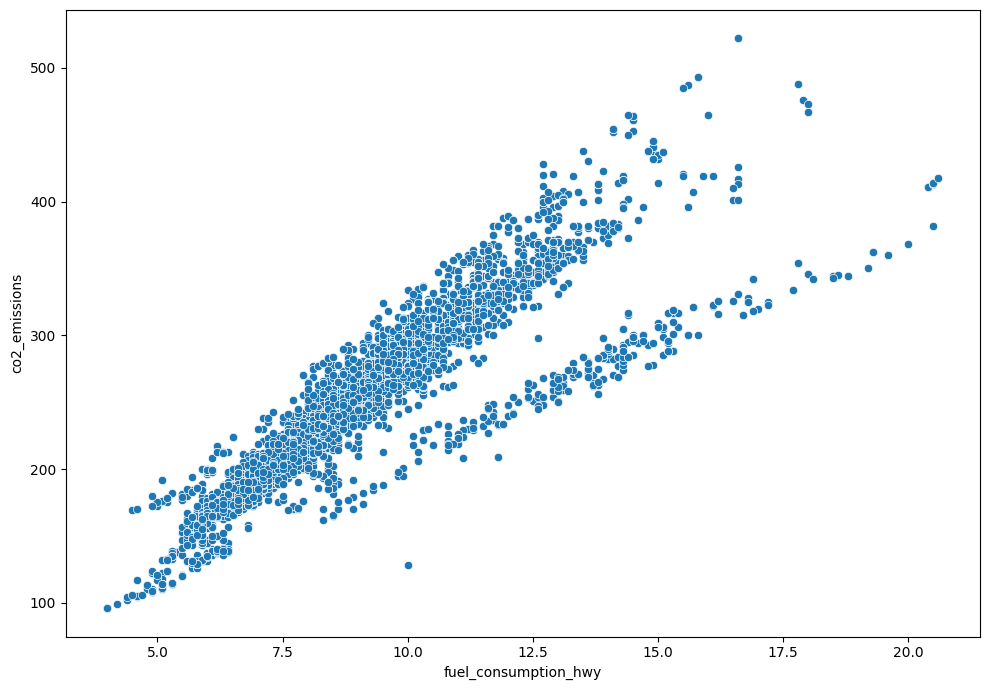

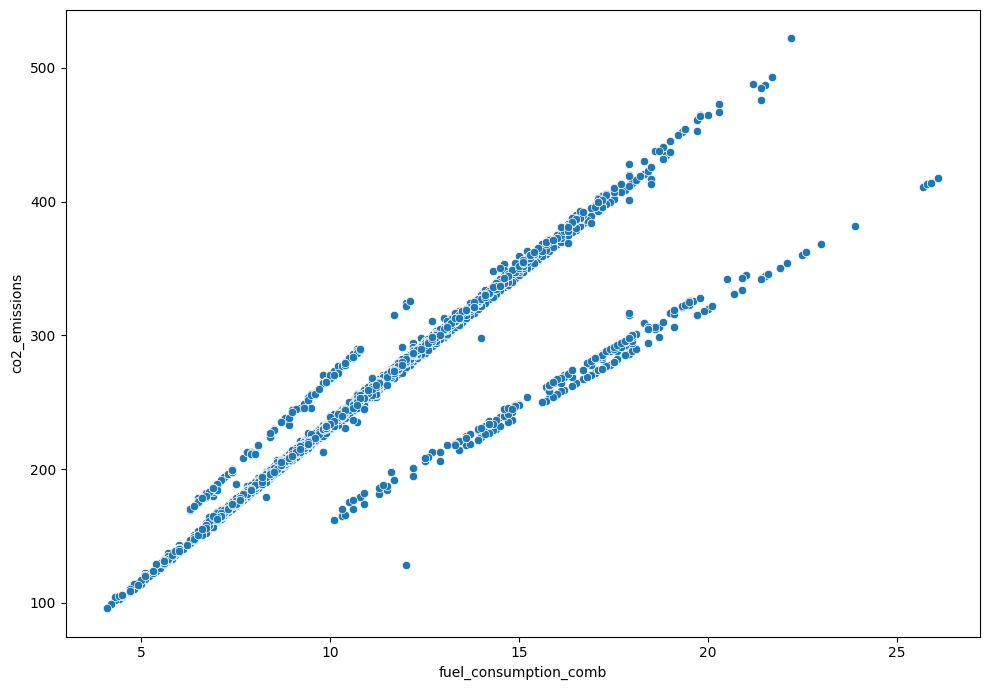

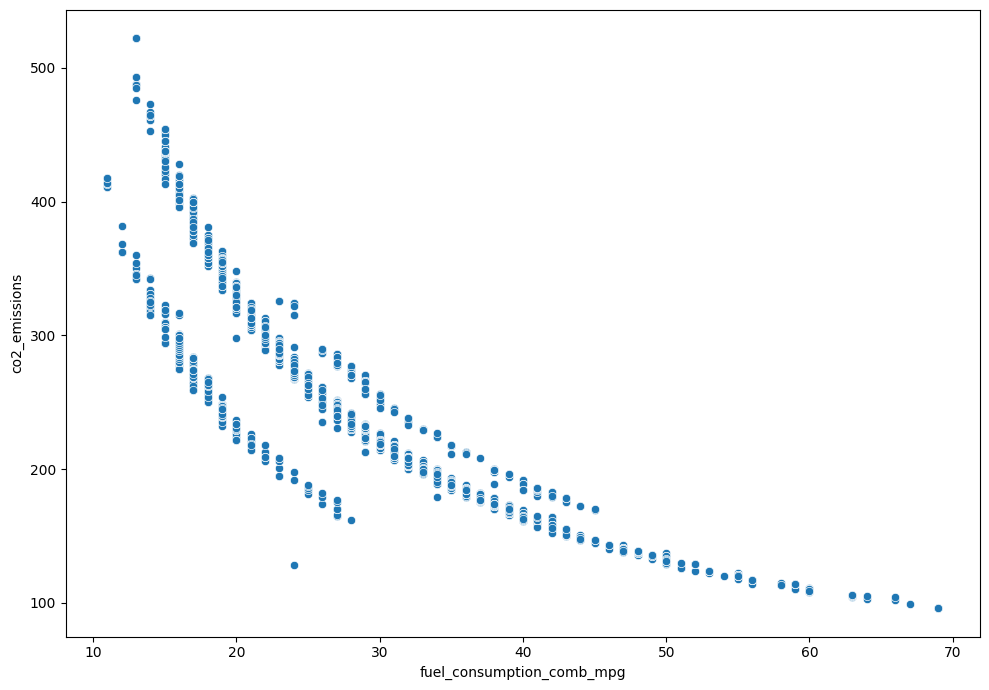

In [9]:
for i in transport_df_IQV_TO_DV.columns:
    plt.figure(figsize=(10,7))
    sns.scatterplot(data=transport_df_quantitative, x=i, y='co2_emissions')
    plt.tight_layout()

In [10]:
def create_ANOVA(formula):

    # Fit the model using the formula
    model = ols(formula, data=transport_df_quantitative).fit()
    
    # Define the sum of squares for each source of variation
    SS_reg = np.sum((model.fittedvalues - np.mean(transport_df_quantitative['co2_emissions']))**2)  # Regression sum of squares
    SS_res = np.sum(model.resid**2)  # Residual sum of squares
    SS_tot = SS_reg + SS_res  # Total sum of squares
    
    # Calculate degrees of freedom
    n_obs = len(transport_df_quantitative)  # Number of observations
    k_params = len(model.params) - 1  # Number of parameters (excluding intercept)
    df_reg = k_params  # Degrees of freedom for regression
    df_res = n_obs - k_params - 1  # Degrees of freedom for residual
    df_tot = n_obs - 1  # Total degrees of freedom
    
    # Calculate mean squares
    MS_reg = SS_reg / df_reg  # Mean square for regression
    MS_res = SS_res / df_res  # Mean square for residual
    
    # Calculate F-value
    F_value = MS_reg / MS_res
    
    # Calculate p-value
    from scipy.stats import f
    p_value = 1 - f.cdf(F_value, df_reg, df_res)
    
    # Create the ANOVA table
    anova_table_manual = pd.DataFrame({
        '': ['Regression', 'Residual', 'Total'],
        'SS': [SS_reg, SS_res, SS_tot],
        'DF': [df_reg, df_res, df_tot],
        'MS': [MS_reg, MS_res, np.nan],  # No mean square for total row
        'F': [F_value, np.nan, np.nan],  # No F-value for total row
        'Pr(>F)': [p_value, np.nan, np.nan]  # No p-value for total row
    })
    
    # Print the ANOVA table
    print(anova_table_manual)

    return SS_res, MS_res, df_res

def F_test(low_feature_SSE, SS_res, MS_res, features_added):
    f_test = ((low_feature_SSE - SS_res) / features_added) / MS_res
    print("f_test:", f_test)
    return f_test

def P_value(f_test, features_added, df_res):
    # Calculate the right-tailed F probability distribution
    probability = 1 - f.cdf(f_test, features_added, df_res)
    print("p_value:", probability)
    

In [11]:
for i in transport_df_IQV_TO_DV.columns:
    formula = f'co2_emissions ~ {i}'
    print(formula)
    create_ANOVA(formula)
    print()

co2_emissions ~ engine_size
                         SS    DF            MS             F        Pr(>F)
0  Regression  1.831464e+07     1  1.831464e+07  19410.413548  1.110223e-16
1    Residual  6.966209e+06  7383  9.435472e+02           NaN           NaN
2       Total  2.528085e+07  7384           NaN           NaN           NaN

co2_emissions ~ cylinders
                         SS    DF            MS             F        Pr(>F)
0  Regression  1.752710e+07     1  1.752710e+07  16689.019648  1.110223e-16
1    Residual  7.753754e+06  7383  1.050217e+03           NaN           NaN
2       Total  2.528085e+07  7384           NaN           NaN           NaN

co2_emissions ~ fuel_consumption_city
                         SS    DF            MS             F        Pr(>F)
0  Regression  2.137876e+07     1  2.137876e+07  40449.946561  1.110223e-16
1    Residual  3.902091e+06  7383  5.285238e+02           NaN           NaN
2       Total  2.528085e+07  7384           NaN           NaN         

In [12]:
# So here the selected feature is "fuel_consumption_city"

# Construct the formula string dynamically
formula = f'co2_emissions ~ fuel_consumption_city'

# Fit the model using the formula
model = ols(formula, data=transport_df_quantitative).fit()
# Perform ANOVA analysis
anova_table = sm.stats.anova_lm(model, typ=2)
low_feature_SSE = anova_table.sum_sq['Residual']
print("low_feature_SSE : ", low_feature_SSE)
print()
print(anova_table)

low_feature_SSE :  3902090.9976970227

                             sum_sq      df             F  PR(>F)
fuel_consumption_city  2.137876e+07     1.0  40449.946561     0.0
Residual               3.902091e+06  7383.0           NaN     NaN


In [13]:
for i in transport_df_IQV_TO_DV.columns:
    formula = f'co2_emissions ~ fuel_consumption_city + {i}'
    print(formula)
    SS_res, MS_res, df_res = create_ANOVA(formula)
    print('SSE reduction : ' , (low_feature_SSE - SS_res))
    f_test = F_test(low_feature_SSE, SS_res, MS_res, 1)
    P_value(f_test, 1, df_res)
    print()

co2_emissions ~ fuel_consumption_city + engine_size
                         SS    DF            MS             F        Pr(>F)
0  Regression  2.199293e+07     2  1.099646e+07  24689.111238  1.110223e-16
1    Residual  3.287923e+06  7382  4.453973e+02           NaN           NaN
2       Total  2.528085e+07  7384           NaN           NaN           NaN
SSE reduction :  614168.202823014
f_test: 1378.9221815998333
p_value: 1.1102230246251565e-16

co2_emissions ~ fuel_consumption_city + cylinders
                         SS    DF            MS            F        Pr(>F)
0  Regression  2.203237e+07     2  1.101618e+07  25033.68168  1.110223e-16
1    Residual  3.248482e+06  7382  4.400545e+02          NaN           NaN
2       Total  2.528085e+07  7384           NaN          NaN           NaN
SSE reduction :  653608.8840291062
f_test: 1485.2908567980198
p_value: 1.1102230246251565e-16

co2_emissions ~ fuel_consumption_city + fuel_consumption_city
                         SS    DF          

In [14]:
# So here the selected feature are "fuel_consumption_city + cylinders"

# Construct the formula string dynamically
formula = f'co2_emissions ~ fuel_consumption_city + cylinders'

# Fit the model using the formula
model = ols(formula, data=transport_df_quantitative).fit()
# Perform ANOVA analysis
anova_table = sm.stats.anova_lm(model, typ=2)
low_feature_SSE = anova_table.sum_sq['Residual']
print("low_feature_SSE : ", low_feature_SSE)
print()
print(anova_table)

low_feature_SSE :  3248482.113667917

                             sum_sq      df             F         PR(>F)
fuel_consumption_city  4.505272e+06     1.0  10237.986021   0.000000e+00
cylinders              6.536089e+05     1.0   1485.290857  3.086809e-296
Residual               3.248482e+06  7382.0           NaN            NaN


In [15]:
for i in transport_df_IQV_TO_DV.columns:
    formula = f'co2_emissions ~ fuel_consumption_city + cylinders + {i}'
    print(formula)
    SS_res, MS_res, df_res = create_ANOVA(formula)
    print('SSE reduction : ' , (low_feature_SSE - SS_res))
    f_test = F_test(low_feature_SSE, SS_res, MS_res, 1)
    P_value(f_test, 1, df_res)
    print()

co2_emissions ~ fuel_consumption_city + cylinders + engine_size
                         SS    DF            MS            F        Pr(>F)
0  Regression  2.208950e+07     3  7.363168e+06  17029.66928  1.110223e-16
1    Residual  3.191345e+06  7381  4.323729e+02          NaN           NaN
2       Total  2.528085e+07  7384           NaN          NaN           NaN
SSE reduction :  57137.433505228255
f_test: 132.1484950602674
p_value: 1.1102230246251565e-16

co2_emissions ~ fuel_consumption_city + cylinders + cylinders
                         SS    DF            MS            F        Pr(>F)
0  Regression  2.203237e+07     2  1.101618e+07  25033.68168  1.110223e-16
1    Residual  3.248482e+06  7382  4.400545e+02          NaN           NaN
2       Total  2.528085e+07  7384           NaN          NaN           NaN
SSE reduction :  4.656612873077393e-10
f_test: 1.058190103138471e-12
p_value: 0.9999991792569737

co2_emissions ~ fuel_consumption_city + cylinders + fuel_consumption_city
       

In [16]:
# So here the selected feature are "fuel_consumption_city + cylinders + fuel_consumption_comb_mpg"

# Construct the formula string dynamically
formula = f'co2_emissions ~ fuel_consumption_city + cylinders + fuel_consumption_comb_mpg'

# Fit the model using the formula
model = ols(formula, data=transport_df_quantitative).fit()
# Perform ANOVA analysis
anova_table = sm.stats.anova_lm(model, typ=2)
low_feature_SSE = anova_table.sum_sq['Residual']
print("low_feature_SSE : ", low_feature_SSE)
print()
print(anova_table)

low_feature_SSE :  2570450.279061427

                                 sum_sq      df            F         PR(>F)
fuel_consumption_city      1.978761e+05     1.0   568.197452  4.743536e-121
cylinders                  7.893568e+05     1.0  2266.623403   0.000000e+00
fuel_consumption_comb_mpg  6.780318e+05     1.0  1946.955758   0.000000e+00
Residual                   2.570450e+06  7381.0          NaN            NaN


In [17]:
for i in transport_df_IQV_TO_DV.columns:
    formula = f'co2_emissions ~ fuel_consumption_city + cylinders + fuel_consumption_comb_mpg + {i}'
    print(formula)
    SS_res, MS_res, df_res = create_ANOVA(formula)
    print('SSE reduction : ' , (low_feature_SSE - SS_res))
    f_test = F_test(low_feature_SSE, SS_res, MS_res, 1)
    P_value(f_test, 1, df_res)
    print()

co2_emissions ~ fuel_consumption_city + cylinders + fuel_consumption_comb_mpg + engine_size
                         SS    DF            MS             F        Pr(>F)
0  Regression  2.275623e+07     4  5.689059e+06  16630.359313  1.110223e-16
1    Residual  2.524615e+06  7380  3.420887e+02           NaN           NaN
2       Total  2.528085e+07  7384           NaN           NaN           NaN
SSE reduction :  45835.406045364216
f_test: 133.986890527455
p_value: 1.1102230246251565e-16

co2_emissions ~ fuel_consumption_city + cylinders + fuel_consumption_comb_mpg + cylinders
                         SS    DF            MS             F        Pr(>F)
0  Regression  2.271040e+07     3  7.570133e+06  21737.495609  1.110223e-16
1    Residual  2.570450e+06  7381  3.482523e+02           NaN           NaN
2       Total  2.528085e+07  7384           NaN           NaN           NaN
SSE reduction :  4.656612873077393e-10
f_test: 1.3371376951408785e-12
p_value: 0.9999990774000692

co2_emissions ~ f

In [18]:
# So here the selected feature are "fuel_consumption_city + cylinders + fuel_consumption_comb_mpg + fuel_consumption_hwy"

# Construct the formula string dynamically
formula = f'co2_emissions ~ fuel_consumption_city + cylinders + fuel_consumption_comb_mpg + fuel_consumption_hwy'

# Fit the model using the formula
model = ols(formula, data=transport_df_quantitative).fit()
# Perform ANOVA analysis
anova_table = sm.stats.anova_lm(model, typ=2)
low_feature_SSE = anova_table.sum_sq['Residual']
print("low_feature_SSE : ", low_feature_SSE)
print()
print(anova_table)

low_feature_SSE :  2468974.393192194

                                 sum_sq      df            F        PR(>F)
fuel_consumption_city      6.738205e+03     1.0    20.141137  7.302397e-06
cylinders                  8.782390e+05     1.0  2625.140046  0.000000e+00
fuel_consumption_comb_mpg  6.347237e+05     1.0  1897.249801  0.000000e+00
fuel_consumption_hwy       1.014759e+05     1.0   303.321104  1.319853e-66
Residual                   2.468974e+06  7380.0          NaN           NaN


In [19]:
for i in transport_df_IQV_TO_DV.columns:
    formula = f'co2_emissions ~ fuel_consumption_city + cylinders + fuel_consumption_comb_mpg + fuel_consumption_hwy + {i}'
    print(formula)
    SS_res, MS_res, df_res = create_ANOVA(formula)
    print('SSE reduction : ' , (low_feature_SSE - SS_res))
    f_test = F_test(low_feature_SSE, SS_res, MS_res, 1)
    P_value(f_test, 1, df_res)
    print()

co2_emissions ~ fuel_consumption_city + cylinders + fuel_consumption_comb_mpg + fuel_consumption_hwy + engine_size
                         SS    DF            MS             F        Pr(>F)
0  Regression  2.285149e+07     5  4.570298e+06  13881.937525  1.110223e-16
1    Residual  2.429360e+06  7379  3.292262e+02           NaN           NaN
2       Total  2.528085e+07  7384           NaN           NaN           NaN
SSE reduction :  39614.124831748195
f_test: 120.32493942561644
p_value: 1.1102230246251565e-16

co2_emissions ~ fuel_consumption_city + cylinders + fuel_consumption_comb_mpg + fuel_consumption_hwy + cylinders
                         SS    DF            MS             F        Pr(>F)
0  Regression  2.281187e+07     4  5.702969e+06  17046.717562  1.110223e-16
1    Residual  2.468974e+06  7380  3.345494e+02           NaN           NaN
2       Total  2.528085e+07  7384           NaN           NaN           NaN
SSE reduction :  -9.313225746154785e-10
f_test: -2.7838120231679525e

In [20]:
# So here the selected feature are "fuel_consumption_city + cylinders + fuel_consumption_comb_mpg + fuel_consumption_hwy + engine_size"

# Construct the formula string dynamically
formula = f'co2_emissions ~ fuel_consumption_city + cylinders + fuel_consumption_comb_mpg + fuel_consumption_hwy + engine_size'

# Fit the model using the formula
model = ols(formula, data=transport_df_quantitative).fit()
# Perform ANOVA analysis
anova_table = sm.stats.anova_lm(model, typ=2)
low_feature_SSE = anova_table.sum_sq['Residual']
print("low_feature_SSE : ", low_feature_SSE)
print()
print(anova_table)

low_feature_SSE :  2429360.2683604453

                                 sum_sq      df            F         PR(>F)
fuel_consumption_city      3.593249e+03     1.0    10.914224   9.588323e-04
cylinders                  1.842402e+05     1.0   559.615668  2.579535e-119
fuel_consumption_comb_mpg  6.258375e+05     1.0  1900.934707   0.000000e+00
fuel_consumption_hwy       9.525460e+04     1.0   289.328733   1.126141e-63
engine_size                3.961412e+04     1.0   120.324939   8.794998e-28
Residual                   2.429360e+06  7379.0          NaN            NaN


In [21]:
for i in transport_df_IQV_TO_DV.columns:
    formula = f'co2_emissions ~ fuel_consumption_city + cylinders + fuel_consumption_comb_mpg + fuel_consumption_hwy + engine_size + {i}'
    print(formula)
    SS_res, MS_res, df_res = create_ANOVA(formula)
    print('SSE reduction : ' , (low_feature_SSE - SS_res))
    f_test = F_test(low_feature_SSE, SS_res, MS_res, 1)
    P_value(f_test, 1, df_res)
    print()

co2_emissions ~ fuel_consumption_city + cylinders + fuel_consumption_comb_mpg + fuel_consumption_hwy + engine_size + engine_size
                         SS    DF            MS             F        Pr(>F)
0  Regression  2.285149e+07     5  4.570298e+06  13881.937525  1.110223e-16
1    Residual  2.429360e+06  7379  3.292262e+02           NaN           NaN
2       Total  2.528085e+07  7384           NaN           NaN           NaN
SSE reduction :  -4.656612873077393e-10
f_test: -1.414411309757203e-12
p_value: 1.0

co2_emissions ~ fuel_consumption_city + cylinders + fuel_consumption_comb_mpg + fuel_consumption_hwy + engine_size + cylinders
                         SS    DF            MS             F        Pr(>F)
0  Regression  2.285149e+07     5  4.570298e+06  13881.937525  1.110223e-16
1    Residual  2.429360e+06  7379  3.292262e+02           NaN           NaN
2       Total  2.528085e+07  7384           NaN           NaN           NaN
SSE reduction :  -4.656612873077393e-10
f_test: -1.

In [22]:
# Since we will stop add here because if we add "fuel_consumption_comb" Then the p value will be 0.736 so it is greater threshold_value 0.5 so we won't be adding "fuel_consumption_comb"

In [23]:
anova_table

,sum_sq,df,F,PR(>F)
fuel_consumption_city,3.593249e+03,1.0,10.914224,9.588323e-04
cylinders,1.842402e+05,1.0,559.615668,2.579535e-119
fuel_consumption_comb_mpg,6.258375e+05,1.0,1900.934707,0.000000e+00
fuel_consumption_hwy,9.525460e+04,1.0,289.328733,1.126141e-63
engine_size,3.961412e+04,1.0,120.324939,8.794998e-28
Residual,2.429360e+06,7379.0,NaN,NaN


In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_emissions   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.388e+04
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:19:39   Log-Likelihood:                -31880.
No. Observations:                7385   AIC:                         6.377e+04
Df Residuals:                    7379   BIC:                         6.381e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   227.9495      4.197     54.316      0.000     219.723     236.176
fuel_consumption_city         0.8936      0.270      3.304      0.001       0.363       1.424
cylinders                     7.5376      0.319     23.656      0.000       6.913       8.162
fuel_consumption_comb_mpg    -3.4246      0.079    -43.600      0.000      -3.579      -3.271
fuel_consumption_hwy          5.2442      0.308     17.010      0.000       4.640       5.849
engine_size                   4.9961      0.455     10.969      0.000       4.103       5.889
==============================================================================
Omnibus:                     1193.000   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7805.871
Skew:                          -0.609   Prob(JB):                         0.00
Kurtosis:                       7.887   Cond. No.                         646.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""